# Hepsi Emlak Scraper

In [1]:
#!pip install beautifulsoup

In [10]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

<bound method Tag.prettify of <!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22tr-TR%22%7D%7D" data-n-head-ssr="" lang="tr-TR">
<head>
<title>Konya Satılık Konut İlanları ve Fiyatları | hepsiemlak</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="tr" data-n-head="ssr" http-equiv="content-language"/><meta content="no-referrer-when-downgrade" data-n-head="ssr" name="referrer"/><meta content="yes" data-hid="mobile-web-app-capable" data-n-head="ssr" name="mobile-web-app-capable"/><meta content="Hepsiemlak" data-hid="apple-mobile-web-app-title" data-n-head="ssr" name="apple-mobile-web-app-title"/><meta content="hemlak-storefront" data-hid="author" data-n-head="ssr" name="author"/><meta content="white" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="Konya satılık konut ilanları hepsiemlak'ta. Her bütçeye uygun Konya satılık konut fiyatları hepsiemla
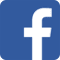
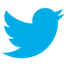
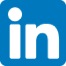
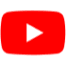
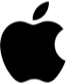

In [11]:
url="https://www.hepsiemlak.com/konya-satilik"
page=requests.get(url)
soup=BeautifulSoup(page.content,"html.parser")
soup.prettify

In [12]:
pages=soup.find_all("li",{"class":"he-pagination__item"})
last_page=0
for i in pages:
    last_page=i.text
last_page=int(last_page)
print(last_page)

146


In [13]:
prices=[]
room_counts=[]
meter_squares=[]
build_ages=[]
floor_types=[]
towns=[]
neighbourhoods=[]
listing_dates=[]
estate_agents=[]
advert_noes=[]

for i in range(1,last_page+1):
    
    url="https://www.hepsiemlak.com/konya-satilik?page="+str(i)
    page=requests.get(url)
    soup=BeautifulSoup(page.content,"html.parser")       
    price=soup.find_all("span",{"class":"list-view-price"})     
    room_count=soup.find_all("span",{"class":"celly houseRoomCount"})     
    meter_square=soup.find_all("span",{"class":"celly squareMeter list-view-size"})   
    build_age=soup.find_all("span",{"class":"celly buildingAge"})    
    location=soup.find_all("div",{"class":"list-view-location"})
    advert_no=soup.find_all("span",{"class":"phone-listing-id"})
    
    for a,b,c,d,e,f in zip(price,room_count,meter_square,build_age,location,advert_no):
                                 
        prices.append(a.text.replace("\n","").replace(".","").replace("TL",""))  
        if b.text =="Stüdyo":
            room_counts.append(1)
        else:
            g=b.text.split(" + ")
            room_counts.append(int(g[0])+int(g[1]))
        meter_squares.append(c.text.replace("\n","").replace(" ","").replace("m2",""))
        if d.text == "Sıfır Bina":
            build_ages.append(0)
        else:
            build_ages.append(d.text)
        towns.append(e.text.replace("\n","").replace(" ","").split(",")[0])
        neighbourhoods.append(e.text.replace("\n","").replace(" ","").replace("Mahallesi","").split(",")[1])
        advert_noes.append(f.text.replace("\n","").replace(" ","").replace("İlanNo:",""))

In [14]:
datas={"Advert_No":advert_noes,"Price":prices,"Room_Count":room_counts,"Meter_Square":meter_squares,"Build_Age":build_ages,"Town":towns,"Neighbourhood":neighbourhoods}
df=pd.DataFrame(datas)
df

,Advert_No,Price,Room_Count,Meter_Square,Build_Age,Town,Neighbourhood
0,135948-12,3600000,6,275,20,Meram,Havzan
1,129953-61,3360000,5,220,5,Selçuklu,Sancak
2,125942-75,1000000,2,100,0,Ereğli,Atakent
3,125942-72,1250000,3,130,25,Ereğli,Aydınlar
4,103426-78,3300000,5,230,0,Selçuklu,Selçuk
...,...,...,...,...,...,...,...
3481,121431-440,1700000,4,165,0,Karatay,Selimsultan
3482,121431-437,1180000,4,135,18,Selçuklu,Buhara
3483,121431-420,1750000,4,150,0,Selçuklu,SelahaddinEyyubi
3484,121431-419,2000000,4,150,0,Selçuklu,SelahaddinEyyubi


In [15]:
df.to_csv("Hepsi-Emlak-Datas.csv")